In [1]:
from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
plt.rcParams['font.size']=15

--No graphics will be displayed.


In [2]:
!nrnivmodl

/home/mjy/anaconda3/envs/bilinear_network/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/home/mjy/project/bilinear_network/ganglion
Mod files: "./capump.mod" "./spike.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


In [3]:
h.load_file('mosinit.hoc')

	1 
	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	0 
	0 
	0 
	0 
	1 
loading: SmallSimple/CTT1209B/ctt1209b
	1 


1.0

In [4]:
ic = h.IClamp[0]
ic.amp = 0

# Passive

In [6]:
def change_to_pas():
    for sec in h.allsec():
        #if sec != h.soma:
            sec.gnabar_spike = 0
            sec.gkbar_spike = 0
            sec.gcabar_spike = 0
            sec.gabar_spike = 0
            sec.gkcbar_spike = 0
change_to_pas()

In [5]:
for sec in h.allsec():
    if sec != h.soma:
        sec.Ra = 500
        sec.cm = 0.5

In [6]:
modi_dend = [h.dend1[0], h.dend1[1], h.dend1[4], h.dend2[0], h.dend2[1], h.dend2[4]]
for sec in modi_dend:
    sec.L *= 4

In [7]:
for sec in h.allsec():
    print(sec.name())

soma
dend1[0]
dend1[1]
dend1[2]
dend1[3]
dend1[4]
dend1[5]
dend1[6]
dend2[0]
dend2[1]
dend2[2]
dend2[3]
dend2[4]
dend2[5]
dend2[6]
dend2[7]
dend2[8]
initseg
narrowr
axon


In [8]:
# Original list of sections
all_sections = [sec for sec in h.allsec()]

# New list with only 'dend1' and 'dend2'
selected_sections = [sec for sec in all_sections if 'dend' in sec.name()]

for sec in selected_sections:
    print(sec, sec.nseg)

dend1[0] 1
dend1[1] 1
dend1[2] 1
dend1[3] 5
dend1[4] 1
dend1[5] 1
dend1[6] 6
dend2[0] 3
dend2[1] 2
dend2[2] 3
dend2[3] 2
dend2[4] 2
dend2[5] 1
dend2[6] 5
dend2[7] 2
dend2[8] 5


In [9]:
seg_list = [seg for sec in selected_sections for seg in sec]

In [10]:
N = len(seg_list)
print('the total number of segments is', N)

the total number of segments is 41


In [41]:
KEE = np.zeros(int(N*(N-1)/2))

In [13]:
ns0 = h.NetStim()
ns1 = h.NetStim()

syn0 = h.ExpSyn(seg_list[-1])
syn1 = h.ExpSyn(seg_list[1])

nc0 = h.NetCon(ns0, syn0)
nc1 = h.NetCon(ns1, syn1)

ns0.start = ns1.start = 0
ns0.number = ns1.number = 1
ns0.interval = ns1.interval = 50
ns0.noise = ns1.noise = 0
nc0.delay = nc1.delay = 000

syn0.tau = syn1.tau = 7
syn0.e = syn1.e = 0


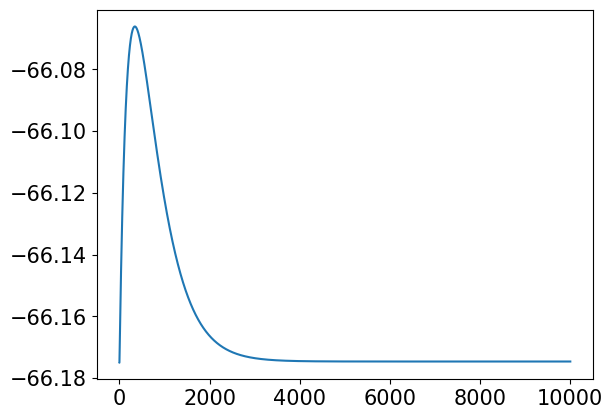

In [19]:
nc0.weight[0] = 0.0000
nc1.weight[0] = 0.000
t = h.Vector().record(h._ref_t)
v = h.Vector().record(h.soma(0.5)._ref_v)
h.finitialize(-66.175)
h.continuerun(1000)
plt.plot(v)

In [42]:
for i in range(N):
    for j in range(i):
        ns0 = h.NetStim()
        ns1 = h.NetStim()

        syn0 = h.ExpSyn(seg_list[i])
        syn1 = h.ExpSyn(seg_list[j])

        nc0 = h.NetCon(ns0, syn0)
        nc1 = h.NetCon(ns1, syn1)

        ns0.start = ns1.start = 0
        ns0.number = ns1.number = 1
        ns0.interval = ns1.interval = 50
        ns0.noise = ns1.noise = 0
        nc0.delay = nc1.delay = 000

        syn0.tau = syn1.tau = 7
        syn0.e = syn1.e = 0

        for k in range(3):
            if k == 0:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-62.5)
                h.continuerun(200)
                v1 = np.array(v)
            elif k == 1:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.000
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-62.5)
                h.continuerun(200)
                v2 = np.array(v)
            else:
                nc0.weight[0] = 0.000
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-62.5)
                h.continuerun(200)
                v3 = np.array(v)

        tp = np.argmax(v2)
        kappa = (v2[tp] + v3[tp] - v1[tp] + 62.5) / ((v2[tp]+62.5) * (v3[tp]+62.5))
        KEE[int(i*(i-1)/2+j)] = kappa
    print('finish', i)

finish 0
finish 1
finish 2
finish 3
finish 4
finish 5
finish 6
finish 7
finish 8
finish 9
finish 10
finish 11
finish 12
finish 13
finish 14
finish 15
finish 16
finish 17
finish 18
finish 19
finish 20
finish 21
finish 22
finish 23
finish 24
finish 25
finish 26
finish 27
finish 28
finish 29
finish 30
finish 31
finish 32
finish 33
finish 34
finish 35
finish 36
finish 37
finish 38
finish 39
finish 40


(array([86.26890102, 34.87466211,  7.13808874, 16.92746758,  4.28285324,
         2.24339932,  2.6512901 ,  2.44734471,  1.63156314,  0.81578157,
         0.20394539,  1.42761775,  0.        ,  0.40789078,  0.        ,
         0.        ,  0.        ,  0.        ,  0.61183618,  0.        ,
         0.20394539,  0.        ,  0.        ,  0.        ,  0.40789078,
         0.        ,  0.61183618,  0.20394539,  0.40789078,  0.        ,
         0.20394539,  0.        ,  0.        ,  0.20394539,  0.        ,
         0.20394539,  0.40789078,  0.20394539,  0.20394539,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.20394539,  0.40789078,
         0.20394539,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

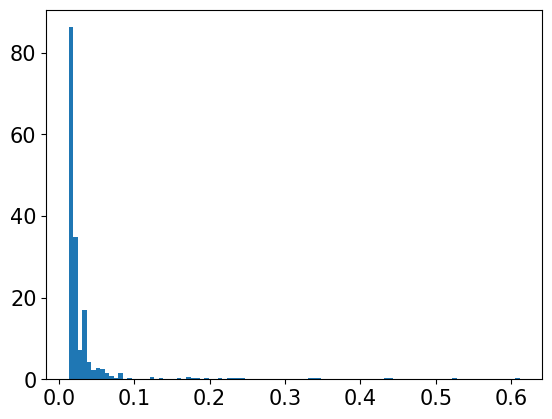

In [44]:
plt.hist(KEE, bins=100, density=True, stacked=True)

In [45]:
with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_passive_EE.p', 'wb') as f:
    pickle.dump(KEE, f)

In [55]:
KEI = np.zeros(int(N*(N-1)))

ns0 = h.NetStim()
ns1 = h.NetStim()

syn0 = h.ExpSyn(seg_list[0])
syn1 = h.ExpSyn(seg_list[1])

nc0 = h.NetCon(ns0, syn0)
nc1 = h.NetCon(ns1, syn1)

ns0.start = ns1.start = 0
ns0.number = ns1.number = 1
ns0.interval = ns1.interval = 50
ns0.noise = ns1.noise = 0
nc0.delay = nc1.delay = 000

syn0.tau = syn1.tau = 7
syn0.e = 0
syn1.e = -80


In [57]:
print('--------------------------------------------------')
print('EI begin')
idx = 0
for i in range(N):
    for j in range(N):
        while i != j:
            ns0 = h.NetStim()
            ns1 = h.NetStim()

            syn0 = h.ExpSyn(seg_list[i])
            syn1 = h.ExpSyn(seg_list[j])

            nc0 = h.NetCon(ns0, syn0)
            nc1 = h.NetCon(ns1, syn1)

            ns0.start = ns1.start = 0
            ns0.number = ns1.number = 1
            ns0.interval = ns1.interval = 50
            ns0.noise = ns1.noise = 0
            nc0.delay = nc1.delay = 000

            syn0.tau = syn1.tau = 7
            syn0.e = 0
            syn1.e = -80
            for k in range(3):
                if k == 0:
                    nc0.weight[0] = 0.0002
                    nc1.weight[0] = 0.0002
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-62.5)
                    h.continuerun(200)
                    v1 = np.array(v)
                elif k == 1:
                    nc0.weight[0] = 0.0002
                    nc1.weight[0] = 0.000
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-62.5)
                    h.continuerun(200)
                    v2 = np.array(v)
                else:
                    nc0.weight[0] = 0.000
                    nc1.weight[0] = 0.0002
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-62.5)
                    h.continuerun(200)
                    v3 = np.array(v)

            tp = np.argmax(v1)
            kappa = (v2[tp] + v3[tp] - v1[tp] + 62.5) / ((v2[tp]+62.5) * (v3[tp]+62.5))
            KEI[idx] = kappa
            idx += 1
            break
    print('finish', i)

--------------------------------------------------
EI begin
finish 0
finish 1
finish 2
finish 3
finish 4
finish 5
finish 6
finish 7
finish 8
finish 9
finish 10
finish 11
finish 12
finish 13
finish 14
finish 15
finish 16
finish 17
finish 18
finish 19
finish 20
finish 21
finish 22
finish 23
finish 24
finish 25
finish 26
finish 27
finish 28
finish 29
finish 30
finish 31
finish 32
finish 33
finish 34
finish 35
finish 36
finish 37
finish 38
finish 39
finish 40


(array([ 0.06792871,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.06792871,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.06792871,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.06792871,  0.        ,  0.06792871,
         0.        ,  0.        ,  0.        ,  0.        ,  0.13585741,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.06792871,
         0.06792871,  0.06792871,  0.06792871,  0.        ,  0.        ,
         0.13585741,  0.        ,  0.        ,  0.06792871,  0.        ,
         0.        ,  0.        ,  0.        ,  0.06792871,  0.        ,
         0.        ,  0.06792871,  0.        ,  0.        ,  0.06792871,
         0.        ,  0.27171483,  0.06792871,  0.06792871,  0.06792871,
         0.06792871,  0.        ,  0.06792871,  0. 

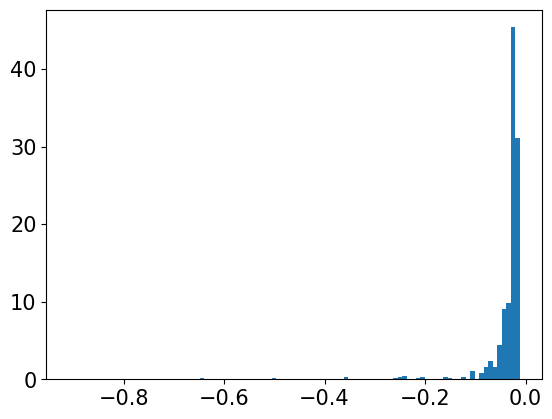

In [58]:
plt.hist(KEI, bins=100, density=True, stacked=True)

In [59]:
with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_passive_EI.p', 'wb') as f:
    pickle.dump(KEI, f)

In [60]:
KII = np.zeros(int(N*(N-1)/2))

In [71]:
print('--------------------------------------------------')
print('II begin')
for i in range(N):
    for j in range(i):
        ns0 = h.NetStim()
        ns1 = h.NetStim()

        syn0 = h.ExpSyn(seg_list[i])
        syn1 = h.ExpSyn(seg_list[j])

        nc0 = h.NetCon(ns0, syn0)
        nc1 = h.NetCon(ns1, syn1)

        ns0.start = ns1.start = 0
        ns0.number = ns1.number = 1
        ns0.interval = ns1.interval = 50
        ns0.noise = ns1.noise = 0
        nc0.delay = nc1.delay = 000

        syn0.tau = syn1.tau = 7
        syn0.e = syn1.e = -80

        for k in range(3):
            if k == 0:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-62.5)
                h.continuerun(200)
                v1 = np.array(v)
            elif k == 1:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.000
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-62.5)
                h.continuerun(200)
                v2 = np.array(v)
            else:
                nc0.weight[0] = 0.000
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-62.5)
                h.continuerun(200)
                v3 = np.array(v)

        tp = np.argmin(v2)
        kappa = (v2[tp] + v3[tp] - v1[tp] + 62.5) / ((v2[tp]+62.5) * (v3[tp]+62.5))
        KII[int(i*(i-1)/2+j)] = kappa
    print('finish', i)

--------------------------------------------------
II begin
finish 0
finish 1
finish 2
finish 3
finish 4
finish 5
finish 6
finish 7
finish 8
finish 9
finish 10
finish 11
finish 12
finish 13
finish 14
finish 15
finish 16
finish 17
finish 18
finish 19
finish 20
finish 21
finish 22
finish 23
finish 24
finish 25
finish 26
finish 27
finish 28
finish 29
finish 30
finish 31
finish 32
finish 33
finish 34
finish 35
finish 36
finish 37
finish 38
finish 39
finish 40


(array([ 0.05710471,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.11420942,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.05710471,  0.11420942,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.05710471,
         0.11420942,  0.05710471,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.05710471,  0.05710471,  0.11420942,  0.05710471,
         0.        ,  0.05710471,  0.        ,  0. 

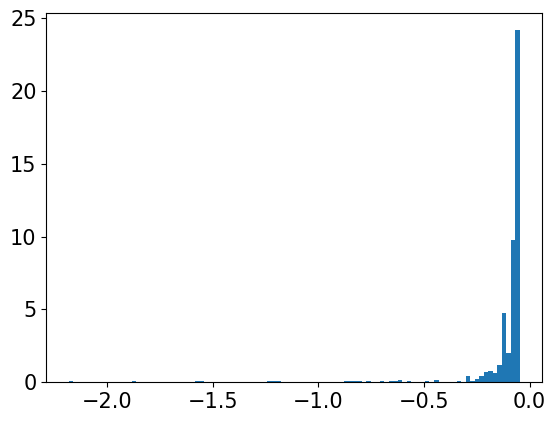

In [72]:
plt.hist(KII, bins=100, density=True, stacked=True)

In [73]:
with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_passive_II.p', 'wb') as f:
    pickle.dump(KII, f)

In [11]:
# active
print('active begin')
print('--------------------------------------------------')
print('EE begin')
KEE = np.zeros(int(N*(N-1)/2))

for i in range(N):
    for j in range(i):
        ns0 = h.NetStim()
        ns1 = h.NetStim()

        syn0 = h.ExpSyn(seg_list[i])
        syn1 = h.ExpSyn(seg_list[j])

        nc0 = h.NetCon(ns0, syn0)
        nc1 = h.NetCon(ns1, syn1)

        ns0.start = ns1.start = 0
        ns0.number = ns1.number = 1
        ns0.interval = ns1.interval = 50
        ns0.noise = ns1.noise = 0
        nc0.delay = nc1.delay = 000

        syn0.tau = syn1.tau = 7
        syn0.e = syn1.e = 0

        for k in range(3):
            if k == 0:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-66.175)
                h.continuerun(200)
                v1 = np.array(v)
            elif k == 1:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.000
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-66.175)
                h.continuerun(200)
                v2 = np.array(v)
            else:
                nc0.weight[0] = 0.000
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-66.175)
                h.continuerun(200)
                v3 = np.array(v)

        tp = np.argmax(v2)
        kappa = (v2[tp] + v3[tp] - v1[tp] + 66.175) / ((v2[tp]+66.175) * (v3[tp]+66.175))
        KEE[int(i*(i-1)/2+j)] = kappa
    print('finish', i)

with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_active_EE.p', 'wb') as f:
    pickle.dump(KEE, f)

KEI = np.zeros(int(N*(N-1)))
print('--------------------------------------------------')
print('EI begin')
idx = 0
for i in range(N):
    for j in range(N):
        while i != j:
            ns0 = h.NetStim()
            ns1 = h.NetStim()

            syn0 = h.ExpSyn(seg_list[i])
            syn1 = h.ExpSyn(seg_list[j])

            nc0 = h.NetCon(ns0, syn0)
            nc1 = h.NetCon(ns1, syn1)

            ns0.start = ns1.start = 0
            ns0.number = ns1.number = 1
            ns0.interval = ns1.interval = 50
            ns0.noise = ns1.noise = 0
            nc0.delay = nc1.delay = 000

            syn0.tau = syn1.tau = 7
            syn0.e = 0
            syn1.e = -80
            for k in range(3):
                if k == 0:
                    nc0.weight[0] = 0.0002
                    nc1.weight[0] = 0.0002
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-66.175)
                    h.continuerun(200)
                    v1 = np.array(v)
                elif k == 1:
                    nc0.weight[0] = 0.0002
                    nc1.weight[0] = 0.000
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-66.175)
                    h.continuerun(200)
                    v2 = np.array(v)
                else:
                    nc0.weight[0] = 0.000
                    nc1.weight[0] = 0.0002
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-66.175)
                    h.continuerun(200)
                    v3 = np.array(v)

            tp = np.argmax(v1)
            kappa = (v2[tp] + v3[tp] - v1[tp] + 66.175) / ((v2[tp]+66.175) * (v3[tp]+66.175))
            KEI[idx] = kappa
            idx += 1
            break
    print('finish', i)

with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_active_EI.p', 'wb') as f:
    pickle.dump(KEI, f)

KII = np.zeros(int(N*(N-1)/2))

print('--------------------------------------------------')
print('II begin')
for i in range(N):
    for j in range(i):
        ns0 = h.NetStim()
        ns1 = h.NetStim()

        syn0 = h.ExpSyn(seg_list[i])
        syn1 = h.ExpSyn(seg_list[j])

        nc0 = h.NetCon(ns0, syn0)
        nc1 = h.NetCon(ns1, syn1)

        ns0.start = ns1.start = 0
        ns0.number = ns1.number = 1
        ns0.interval = ns1.interval = 50
        ns0.noise = ns1.noise = 0
        nc0.delay = nc1.delay = 000

        syn0.tau = syn1.tau = 7
        syn0.e = syn1.e = -80

        for k in range(3):
            if k == 0:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-66.175)
                h.continuerun(200)
                v1 = np.array(v)
            elif k == 1:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.000
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-66.175)
                h.continuerun(200)
                v2 = np.array(v)
            else:
                nc0.weight[0] = 0.000
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-66.175)
                h.continuerun(200)
                v3 = np.array(v)

        tp = np.argmin(v2)
        kappa = (v2[tp] + v3[tp] - v1[tp] + 66.175) / ((v2[tp]+66.175) * (v3[tp]+66.175))
        KII[int(i*(i-1)/2+j)] = kappa
    print('finish', i)

with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_active_II.p', 'wb') as f:
    pickle.dump(KII, f)


print('--------------------------------------------------')
print('semiactive begin')

def change_to_semipas():
    for sec in h.allsec():
        if sec != h.soma:
            sec.gnabar_spike = 0
            sec.gkbar_spike = 0
            sec.gcabar_spike = 0
            sec.gabar_spike = 0
            sec.gkcbar_spike = 0
change_to_semipas()
print('EE begin')
KEE = np.zeros(int(N*(N-1)/2))

for i in range(N):
    for j in range(i):
        ns0 = h.NetStim()
        ns1 = h.NetStim()

        syn0 = h.ExpSyn(seg_list[i])
        syn1 = h.ExpSyn(seg_list[j])

        nc0 = h.NetCon(ns0, syn0)
        nc1 = h.NetCon(ns1, syn1)

        ns0.start = ns1.start = 0
        ns0.number = ns1.number = 1
        ns0.interval = ns1.interval = 50
        ns0.noise = ns1.noise = 0
        nc0.delay = nc1.delay = 000

        syn0.tau = syn1.tau = 7
        syn0.e = syn1.e = 0

        for k in range(3):
            if k == 0:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-64.02)
                h.continuerun(200)
                v1 = np.array(v)
            elif k == 1:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.000
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-64.02)
                h.continuerun(200)
                v2 = np.array(v)
            else:
                nc0.weight[0] = 0.000
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-64.02)
                h.continuerun(200)
                v3 = np.array(v)

        tp = np.argmax(v2)
        kappa = (v2[tp] + v3[tp] - v1[tp] + 64.02) / ((v2[tp]+64.02) * (v3[tp]+64.02))
        KEE[int(i*(i-1)/2+j)] = kappa
    print('finish', i)

with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_semiactive_EE.p', 'wb') as f:
    pickle.dump(KEE, f)

KEI = np.zeros(int(N*(N-1)))
print('--------------------------------------------------')
print('EI begin')
idx = 0
for i in range(N):
    for j in range(N):
        while i != j:
            ns0 = h.NetStim()
            ns1 = h.NetStim()

            syn0 = h.ExpSyn(seg_list[i])
            syn1 = h.ExpSyn(seg_list[j])

            nc0 = h.NetCon(ns0, syn0)
            nc1 = h.NetCon(ns1, syn1)

            ns0.start = ns1.start = 0
            ns0.number = ns1.number = 1
            ns0.interval = ns1.interval = 50
            ns0.noise = ns1.noise = 0
            nc0.delay = nc1.delay = 000

            syn0.tau = syn1.tau = 7
            syn0.e = 0
            syn1.e = -80
            for k in range(3):
                if k == 0:
                    nc0.weight[0] = 0.0002
                    nc1.weight[0] = 0.0002
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-64.02)
                    h.continuerun(200)
                    v1 = np.array(v)
                elif k == 1:
                    nc0.weight[0] = 0.0002
                    nc1.weight[0] = 0.000
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-64.02)
                    h.continuerun(200)
                    v2 = np.array(v)
                else:
                    nc0.weight[0] = 0.000
                    nc1.weight[0] = 0.0002
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-64.02)
                    h.continuerun(200)
                    v3 = np.array(v)

            tp = np.argmax(v1)
            kappa = (v2[tp] + v3[tp] - v1[tp] + 64.02) / ((v2[tp]+64.02) * (v3[tp]+64.02))
            KEI[idx] = kappa
            idx += 1
            break
    print('finish', i)

with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_semiactive_EI.p', 'wb') as f:
    pickle.dump(KEI, f)

KII = np.zeros(int(N*(N-1)/2))

print('--------------------------------------------------')
print('II begin')
for i in range(N):
    for j in range(i):
        ns0 = h.NetStim()
        ns1 = h.NetStim()

        syn0 = h.ExpSyn(seg_list[i])
        syn1 = h.ExpSyn(seg_list[j])

        nc0 = h.NetCon(ns0, syn0)
        nc1 = h.NetCon(ns1, syn1)

        ns0.start = ns1.start = 0
        ns0.number = ns1.number = 1
        ns0.interval = ns1.interval = 50
        ns0.noise = ns1.noise = 0
        nc0.delay = nc1.delay = 000

        syn0.tau = syn1.tau = 7
        syn0.e = syn1.e = -80

        for k in range(3):
            if k == 0:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-64.02)
                h.continuerun(200)
                v1 = np.array(v)
            elif k == 1:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.000
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-64.02)
                h.continuerun(200)
                v2 = np.array(v)
            else:
                nc0.weight[0] = 0.000
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-64.02)
                h.continuerun(200)
                v3 = np.array(v)

        tp = np.argmin(v2)
        kappa = (v2[tp] + v3[tp] - v1[tp] + 64.02) / ((v2[tp]+64.02) * (v3[tp]+64.02))
        KII[int(i*(i-1)/2+j)] = kappa
    print('finish', i)

with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_semiactive_II.p', 'wb') as f:
    pickle.dump(KII, f)

active begin
--------------------------------------------------
EE begin
finish 0
finish 1
finish 2
finish 3
finish 4
finish 5
finish 6
finish 7
finish 8
finish 9
finish 10
finish 11
finish 12
finish 13
finish 14
finish 15
finish 16
finish 17
finish 18
finish 19
finish 20
finish 21
finish 22
finish 23
finish 24
finish 25
finish 26
finish 27
finish 28
finish 29
finish 30
finish 31
finish 32
finish 33
finish 34
finish 35
finish 36
finish 37
finish 38
finish 39
finish 40
--------------------------------------------------
EI begin
finish 0
finish 1
finish 2
finish 3
finish 4
finish 5
finish 6
finish 7
finish 8
finish 9
finish 10
finish 11
finish 12
finish 13
finish 14
finish 15
finish 16
finish 17
finish 18
finish 19
finish 20
finish 21
finish 22
finish 23
finish 24
finish 25
finish 26
finish 27
finish 28
finish 29
finish 30
finish 31
finish 32
finish 33
finish 34
finish 35
finish 36
finish 37
finish 38
finish 39
finish 40
--------------------------------------------------
II begin
finish 

In [11]:
def change_to_semipas():
    for sec in h.allsec():
        if sec != h.soma:
            sec.gnabar_spike = 0
            sec.gkbar_spike = 0
            sec.gcabar_spike = 0
            sec.gabar_spike = 0
            sec.gkcbar_spike = 0
change_to_semipas()

KEI = np.zeros(int(N*(N-1)))
print('--------------------------------------------------')
print('EI begin')
idx = 0
for i in range(N):
    for j in range(N):
        while i != j:
            ns0 = h.NetStim()
            ns1 = h.NetStim()

            syn0 = h.ExpSyn(seg_list[i])
            syn1 = h.ExpSyn(seg_list[j])

            nc0 = h.NetCon(ns0, syn0)
            nc1 = h.NetCon(ns1, syn1)

            ns0.start = ns1.start = 0
            ns0.number = ns1.number = 1
            ns0.interval = ns1.interval = 50
            ns0.noise = ns1.noise = 0
            nc0.delay = nc1.delay = 000

            syn0.tau = syn1.tau = 7
            syn0.e = 0
            syn1.e = -80
            for k in range(3):
                if k == 0:
                    nc0.weight[0] = 0.0002
                    nc1.weight[0] = 0.0002
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-64.02)
                    h.continuerun(200)
                    v1 = np.array(v)
                elif k == 1:
                    nc0.weight[0] = 0.0002
                    nc1.weight[0] = 0.000
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-64.02)
                    h.continuerun(200)
                    v2 = np.array(v)
                else:
                    nc0.weight[0] = 0.000
                    nc1.weight[0] = 0.0002
                    t = h.Vector().record(h._ref_t)
                    v = h.Vector().record(h.soma(0.5)._ref_v)
                    h.finitialize(-64.02)
                    h.continuerun(200)
                    v3 = np.array(v)

            tp = np.argmax(v1)
            kappa = (v2[tp] + v3[tp] - v1[tp] + 64.02) / ((v2[tp]+64.02) * (v3[tp]+64.02))
            KEI[idx] = kappa
            idx += 1
            break
    print('finish', i)

with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_semiactive_EI.p', 'wb') as f:
    pickle.dump(KEI, f)

KII = np.zeros(int(N*(N-1)/2))

print('--------------------------------------------------')
print('II begin')
for i in range(N):
    for j in range(i):
        ns0 = h.NetStim()
        ns1 = h.NetStim()

        syn0 = h.ExpSyn(seg_list[i])
        syn1 = h.ExpSyn(seg_list[j])

        nc0 = h.NetCon(ns0, syn0)
        nc1 = h.NetCon(ns1, syn1)

        ns0.start = ns1.start = 0
        ns0.number = ns1.number = 1
        ns0.interval = ns1.interval = 50
        ns0.noise = ns1.noise = 0
        nc0.delay = nc1.delay = 000

        syn0.tau = syn1.tau = 7
        syn0.e = syn1.e = -80

        for k in range(3):
            if k == 0:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-64.02)
                h.continuerun(200)
                v1 = np.array(v)
            elif k == 1:
                nc0.weight[0] = 0.0002
                nc1.weight[0] = 0.000
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-64.02)
                h.continuerun(200)
                v2 = np.array(v)
            else:
                nc0.weight[0] = 0.000
                nc1.weight[0] = 0.0002
                t = h.Vector().record(h._ref_t)
                v = h.Vector().record(h.soma(0.5)._ref_v)
                h.finitialize(-64.02)
                h.continuerun(200)
                v3 = np.array(v)

        tp = np.argmin(v2)
        kappa = (v2[tp] + v3[tp] - v1[tp] + 64.02) / ((v2[tp]+64.02) * (v3[tp]+64.02))
        KII[int(i*(i-1)/2+j)] = kappa
    print('finish', i)

with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_semiactive_II.p', 'wb') as f:
    pickle.dump(KII, f)

--------------------------------------------------
EI begin
finish 0
finish 1
finish 2
finish 3
finish 4
finish 5
finish 6
finish 7
finish 8
finish 9
finish 10
finish 11
finish 12
finish 13
finish 14
finish 15
finish 16
finish 17
finish 18
finish 19
finish 20
finish 21
finish 22
finish 23
finish 24
finish 25
finish 26
finish 27
finish 28
finish 29
finish 30
finish 31
finish 32
finish 33
finish 34
finish 35
finish 36
finish 37
finish 38
finish 39
finish 40
--------------------------------------------------
II begin
finish 0
finish 1
finish 2
finish 3
finish 4
finish 5
finish 6
finish 7
finish 8
finish 9
finish 10
finish 11
finish 12
finish 13
finish 14
finish 15
finish 16
finish 17
finish 18
finish 19
finish 20
finish 21
finish 22
finish 23
finish 24
finish 25
finish 26
finish 27
finish 28
finish 29
finish 30
finish 31
finish 32
finish 33
finish 34
finish 35
finish 36
finish 37
finish 38
finish 39
finish 40
